In [3]:
from src import ajustar_min_cuadrados
import matplotlib.pyplot as plt
import numpy as np

datos = [(-19.849, 300.682), (-29.698, 109.399), (-18.04, 309.383), (-20.754, 287.79), (-13.216, 262.128), (-23.367, 261.066), (-24.874, 241.597), (-18.844, 303.051), (-14.724, 285.93), (-25.477, 228.369), (-25.075, 236.165), (-22.05, 284.392), (-10.302, 205.234), (-20.854, 287.813), (-10.503, 214.57), (-19.648, 298.733), (-12.312, 253.532), (-21.859, 287.969), (-10.603, 214.864), (-14.925, 285.108), (-14.322, 282.151), (-15.126, 291.951), (-22.462, 279.406), (-16.03, 296.948), (-19.95, 299.401), (-16.131, 300.917), (-18.945, 301.778), (-26.281, 211.784), (-18.42, 305.058), (-15.025, 288.366), (-10.201, 207.134), (-25.176, 237.482), (-13.515, 271.179), (-27.286, 185.304), (-21.658, 289.344), (-15.327, 288.652), (-23.065, 272.186), (-28.693, 142.073), (-19.146, 306.702), (-17.739, 300.977), (-12.814, 260.814), (-26.382, 209.756), (-23.166, 272.194), (-14.824, 293.648), (-24.271, 250.622), (-20.251, 293.963), (-19.749, 297.446), (-14.623, 287.544), (-22.663, 279.58), (-22.261, 285.889), (-20.452, 296.984), (-10.402, 209.147), (-13.116, 263.333), (-22.563, 272.813), (-11.307, 226.847), (-25.678, 223.68), (-11.809, 245.787), (-12.714, 255.12), (-18.744, 300.035), (-13.317, 260.956), (-11.407, 236.865), (-25.578, 223.838), (-18.342, 299.782), (-17.538, 305.318), (-24.472, 248.435), (-19.045, 296.226), (-18.543, 308.121), (-13.618, 272.847), (-13.719, 266.499), (-20.352, 296.48), (-24.673, 246.398), (-30.0, 98.855), (-28.995, 131.82), (-24.171, 253.325), (-20.553, 302.853), (-19.111, 245.391), (-28.09, 160.715), (-26.08, 211.185), (-10.0, 199.612), (-11.608, 233.251), (-22.864, 278.807), (-23.869, 253.259), (-20.151, 297.536), (-18.141, 301.492), (-14.121, 279.75), (-17.236, 301.574), (-17.035, 301.841), (-26.482, 205.542), (-13.015, 263.34), (-28.593, 145.435), (-12.01, 244.165), (-17.638, 302.421), (-13.819, 272.136), (-29.095, 129.284), (-12.111, 248.809), (-21.457, 285.511), (-12.076, 252.589), (-27.99, 168.51), (-13.008, -20.955), (-20.955, 295.952), (-15.93, 302.948), (-17.337, 303.511), (-24.07, 256.152), (-24.774, 237.062), (-15.729, 292.451), (-25.779, 218.657), (-21.055, 298.79), (-16.834, 300.864), (-19.246, 301.543), (-17.437, 305.138), (-27.487, 174.301), (-12.156, 293.614), (-12.613, 256.253), (-22.965, 271.269), (-21.558, 288.815), (-21.759, 288.01), (-12.915, 262.254), (-25.879, 221.171), (-17.136, 301.852), (-21.045, 301.85), (-16.628, 302.125), (-23.769, 257.683), (-23.668, 256.16), (-25.377, 232.684), (-28.191, 159.483)]

xs = [x for x, y in datos]
ys = [y for x, y in datos]

In [4]:

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:


    c_ind = sum(ys)

    c_1 = sum(xs)

    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:

    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        c_ind += xi * yi

        c_1 += xi * xi

        c_0 += xi

    return (c_1, c_0, c_ind)

Polinomio resultado:
          4          3         2
0.001853 x + 0.1562 x + 3.259 x + 6.438 x + 78


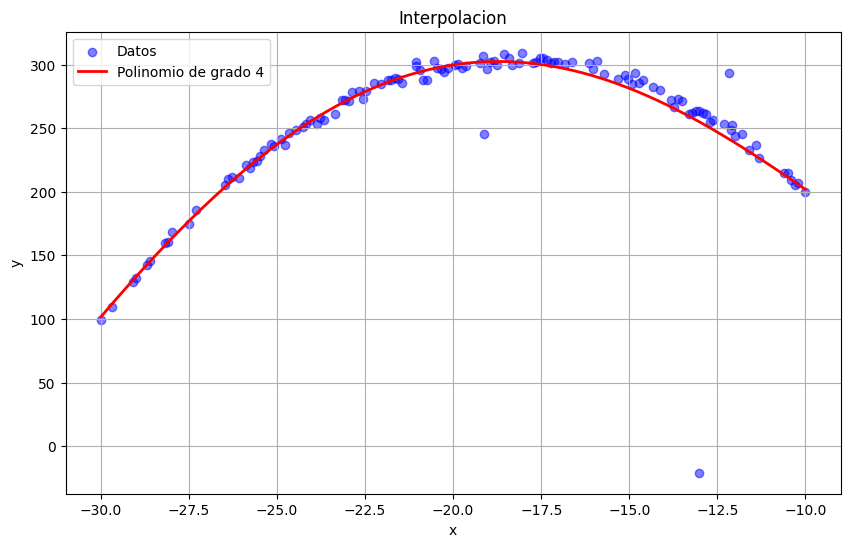

In [6]:

coeficientes = np.polyfit(xs, ys, 4)
polinomio = np.poly1d(coeficientes)


interpolacion = polinomio

print("Polinomio resultado:")
print(polinomio)


plt.figure(figsize=(10, 6))
plt.scatter(xs, ys, alpha=0.5, label="Datos", color="blue")


x_aprox = np.linspace(min(xs), max(xs), 300)
y_aprox = polinomio(x_aprox)
plt.plot(x_aprox, y_aprox, "r-", label="Polinomio de grado 4", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacion")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def calcular_metricas_errores(xs, ys, poly_func):
    errores_relativos = []
    max_error = -1.0
    punto_max = None

    for x_real, y_real in zip(xs, ys):
        y_est = poly_func(x_real)
        
        if y_real != 0:
            e_rel = abs((y_real - y_est) / y_real)
        else:
            e_rel = 0 
            
        errores_relativos.append(e_rel)
        
        if e_rel > max_error:
            max_error = e_rel
            punto_max = (x_real, y_real)

    promedio_error = sum(errores_relativos) / len(errores_relativos)
    return promedio_error, max_error, punto_max

e_promedio, e_maximo, punto_donde_max = calcular_metricas_errores(xs, ys, polinomio)

In [10]:
print(f"error relativo promedio: {e_promedio}")
print(f"maximo error obtenido: {e_maximo}")
print(f"mayor error en el punto: {punto_donde_max}")

error relativo promedio: 0.12332150540036982
maximo error obtenido: 13.168058457660544
mayor error en el punto: (-13.008, -20.955)
